<a href="https://colab.research.google.com/github/ydvshalu001/digit-recognition-mnist/blob/main/MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


In [10]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9102 - loss: 0.2938 - val_accuracy: 0.9800 - val_loss: 0.0612
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9844 - loss: 0.0528 - val_accuracy: 0.9849 - val_loss: 0.0464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9907 - loss: 0.0321 - val_accuracy: 0.9849 - val_loss: 0.0478
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9944 - loss: 0.0192 - val_accuracy: 0.9873 - val_loss: 0.0452
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9948 - loss: 0.0148 - val_accuracy: 0.9853 - val_loss: 0.0507


In [4]:
model.save("mnist_digit_model.h5")

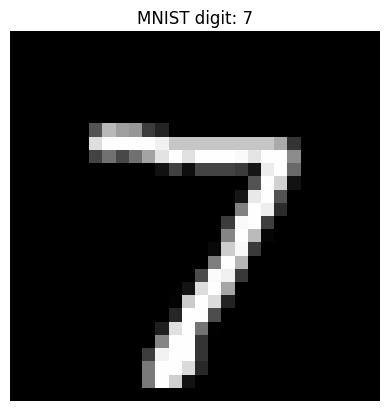

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist


(_, _), (x_test, y_test) = mnist.load_data()
digit = x_test[0]
label = y_test[0]


plt.imshow(digit, cmap='gray')
plt.title(f"MNIST digit: {label}")
plt.axis('off')
plt.show()


digit = digit.reshape(1, 28, 28, 1).astype('float32') / 255.0



In [9]:

prediction = model.predict(digit)
predicted_digit = np.argmax(prediction)

print("✅ Predicted Digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
✅ Predicted Digit: 7


In [12]:
model.save("mnist_model.h5")

KeyboardInterrupt: 